In [19]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
url = 'https://raw.githubusercontent.com/siddhantbhattarai/practice-datasets/main/california_housing.csv'
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [23]:
# Normalize/Standarize the numerical features
scaler = StandardScaler()
numerical_features = df.drop(columns=['median_house_value'])
scaled_features = scaler.fit_transform(numerical_features)
scaled_data = pd.DataFrame(scaled_features, columns=numerical_features.columns)
scaled_data['median_house_value'] = df['median_house_value'].values

In [24]:
# Split the datasets into training and test data sets
X = scaled_data.drop(columns='median_house_value')
y = scaled_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

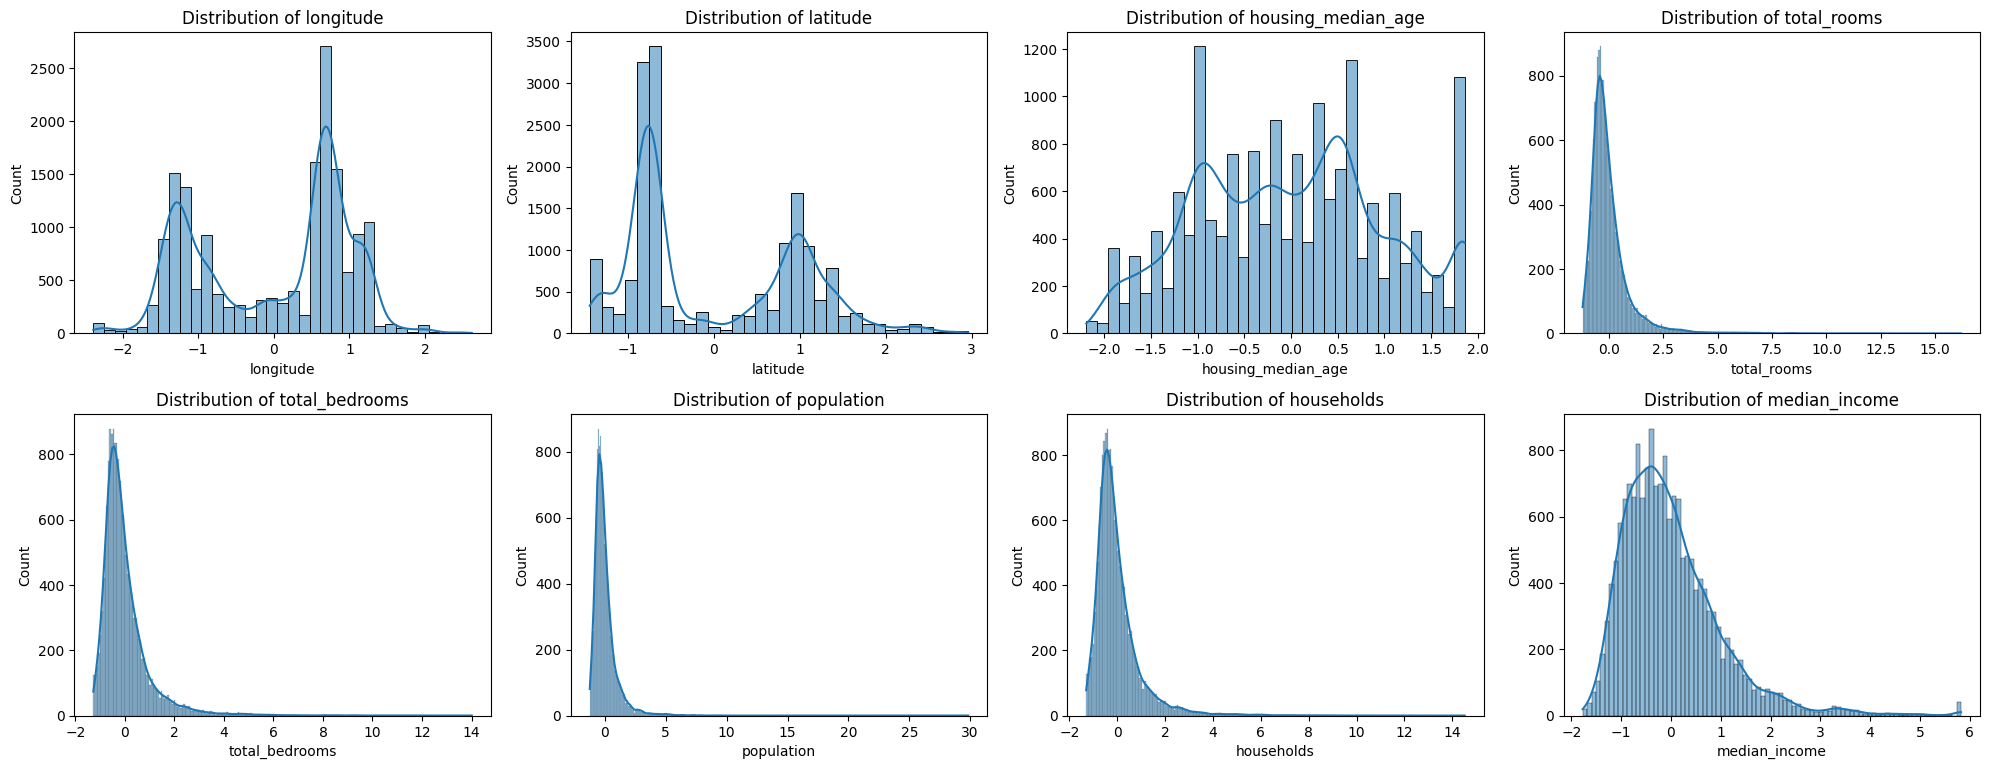

In [25]:
# Explotatory Data Analysis (EDA)
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

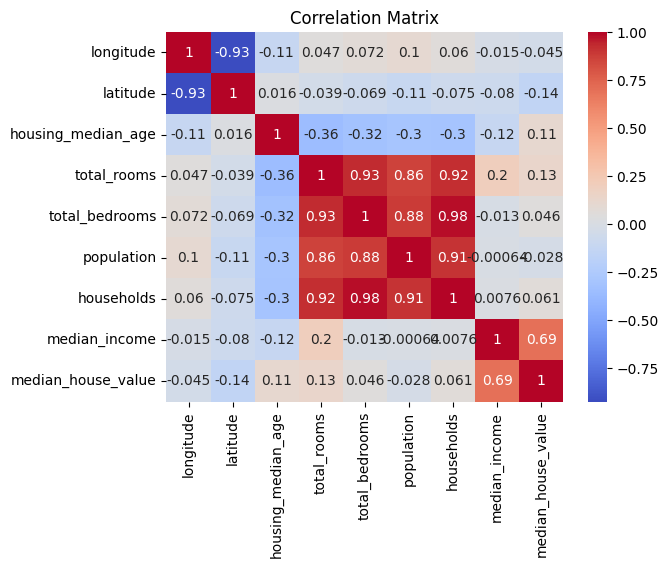

In [26]:
# Analyse the correlation between features and target variables
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

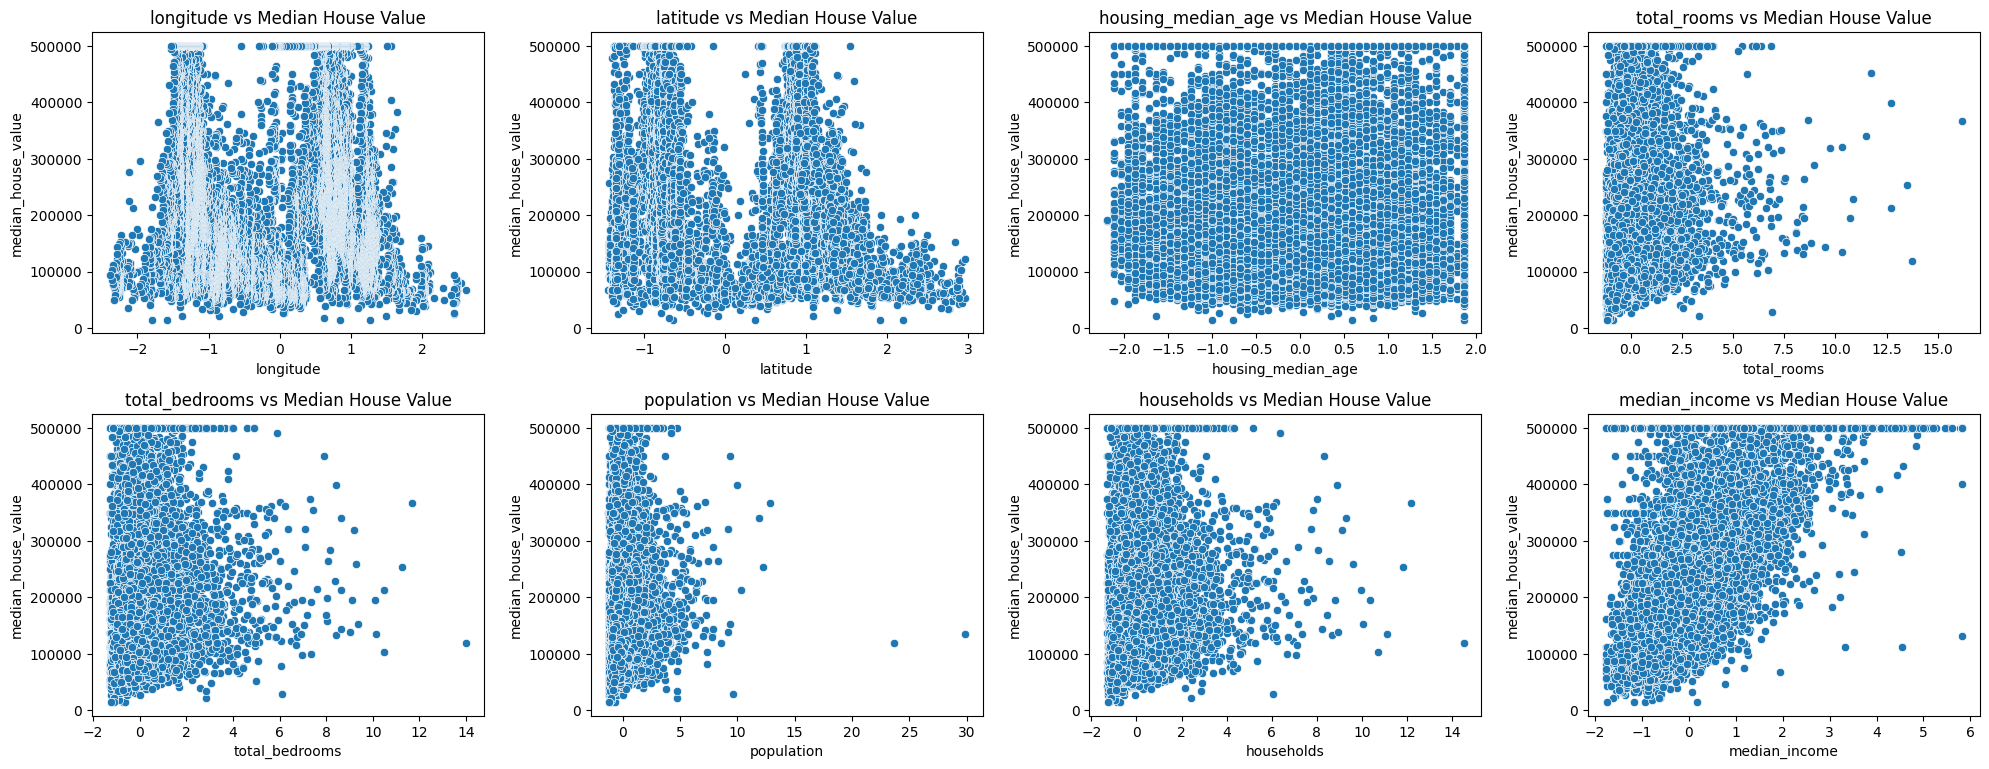

In [27]:
# Visualzie relationship using scatter plot
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.scatterplot(x=scaled_data[col], y=scaled_data['median_house_value'])
    plt.title(f'{col} vs Median House Value')

plt.tight_layout()
plt.show()